In [1]:
!python --version

Python 3.13.5


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [6]:
with open(file=r"../data/australia-borders-coordinates.npy", mode="rb") as fp:
    border = np.load(fp)

# Sorghum site info
sorghum = pd.read_csv(r"../data/Emma Sumner/CSBP_soil_analysis_Themeda_and_Sorghum.csv", skiprows=range(1, 20)) # the preceeding rows are metadata and Themeda samples
sorghum = sorghum.rename(mapper= lambda name: name.lower().strip().replace(' ', '_').replace('(', '').replace(')', '').replace('%', 'prcnt'), axis=1)

themeda = pd.read_csv(r"../data/Emma Sumner/CSBP_soil_analysis_Themeda_and_Sorghum.csv", skiprows=range(20, 35)).drop(0, axis=0)
themeda = themeda.rename(mapper= lambda name: name.lower().strip().replace(' ', '_').replace('(', '').replace(')', '').replace('%', 'prcnt'), axis=1)
themeda = themeda.astype({"total_nitrogen": np.float64, "total_phosphorus": np.float64, "total_carbon": np.float64, "prcnt_clay": np.float64, "prcnt_course_sand": np.float64, "prcnt_fine_sand": np.float64, "prcnt_sand": np.float64, "prcnt_silt": np.float64})

# coordinate info of sample sites
# geo = pd.read_csv(r"../data/Emma Sumner/field_sorghum_locations.csv")

# ___Chemical properties___
-----------------

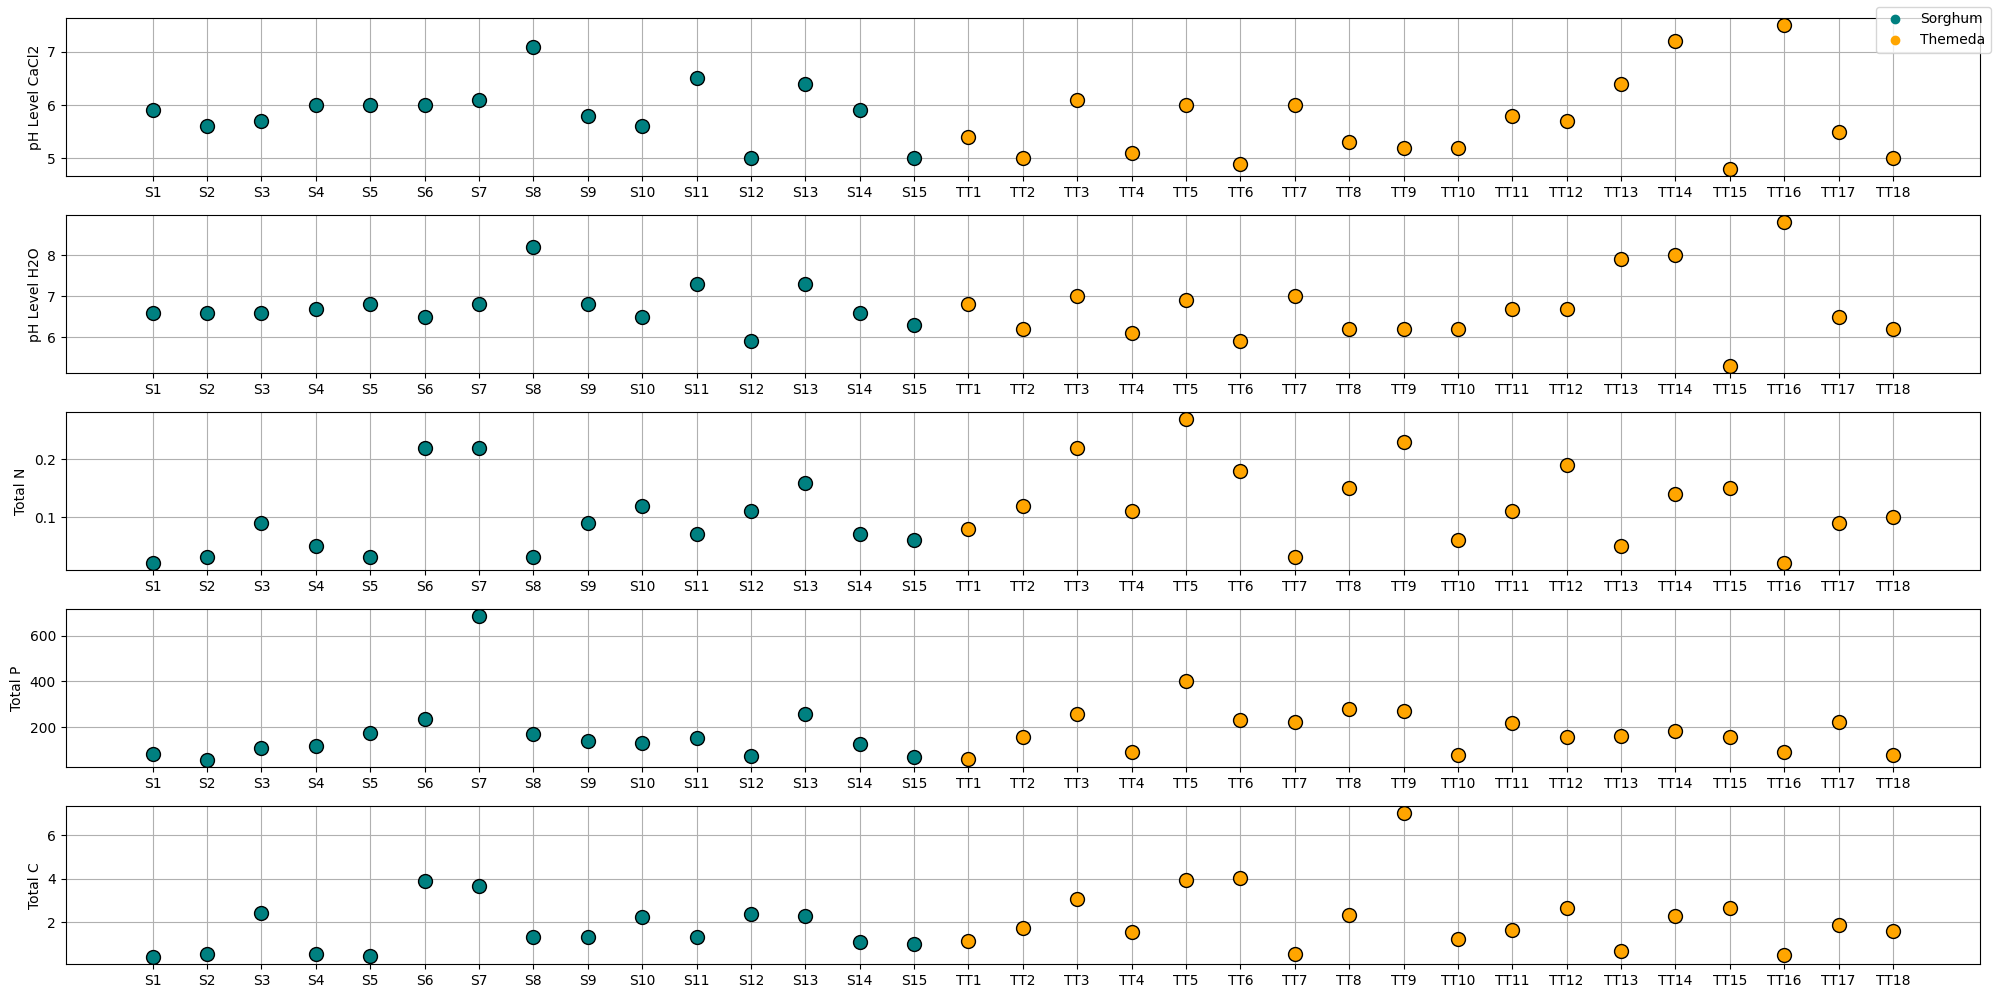

In [31]:
fig, axes = plt.subplots(nrows=5, sharex=False, sharey=False)
fig.set_size_inches(20, 10)

for (prop, name, axis) in zip(('ph_level_cacl2', 'ph_level_h2o', 'total_nitrogen', 'total_phosphorus', 'total_carbon'), ('pH Level CaCl2', 'pH Level H2O', 'Total N', 'Total P', 'Total C'), axes):
    axis.plot(sorghum.customer_sample_id, sorghum[prop], linestyle="none", marker='o', mec="black", mfc="teal", markersize=10)
    axis.plot(themeda.customer_sample_id, themeda[prop], linestyle="none", marker='o', mec="black", mfc="orange", markersize=10)
    axis.grid()
    axis.set_ylabel(name)

fig.legend(handles=(Line2D(xdata=[0], ydata=[0], color="teal", label="Sorghum", marker='o', linestyle="none"),
                    Line2D(xdata=[0], ydata=[0], color="orange", label="Themeda", marker='o', linestyle="none")),
           ncols=1, loc="upper right")    
plt.tight_layout()
# plt.show()
plt.savefig(fname=r"../plots/emma_chemical_props.jpeg", dpi=500)

# ___Soil texture___
--------------

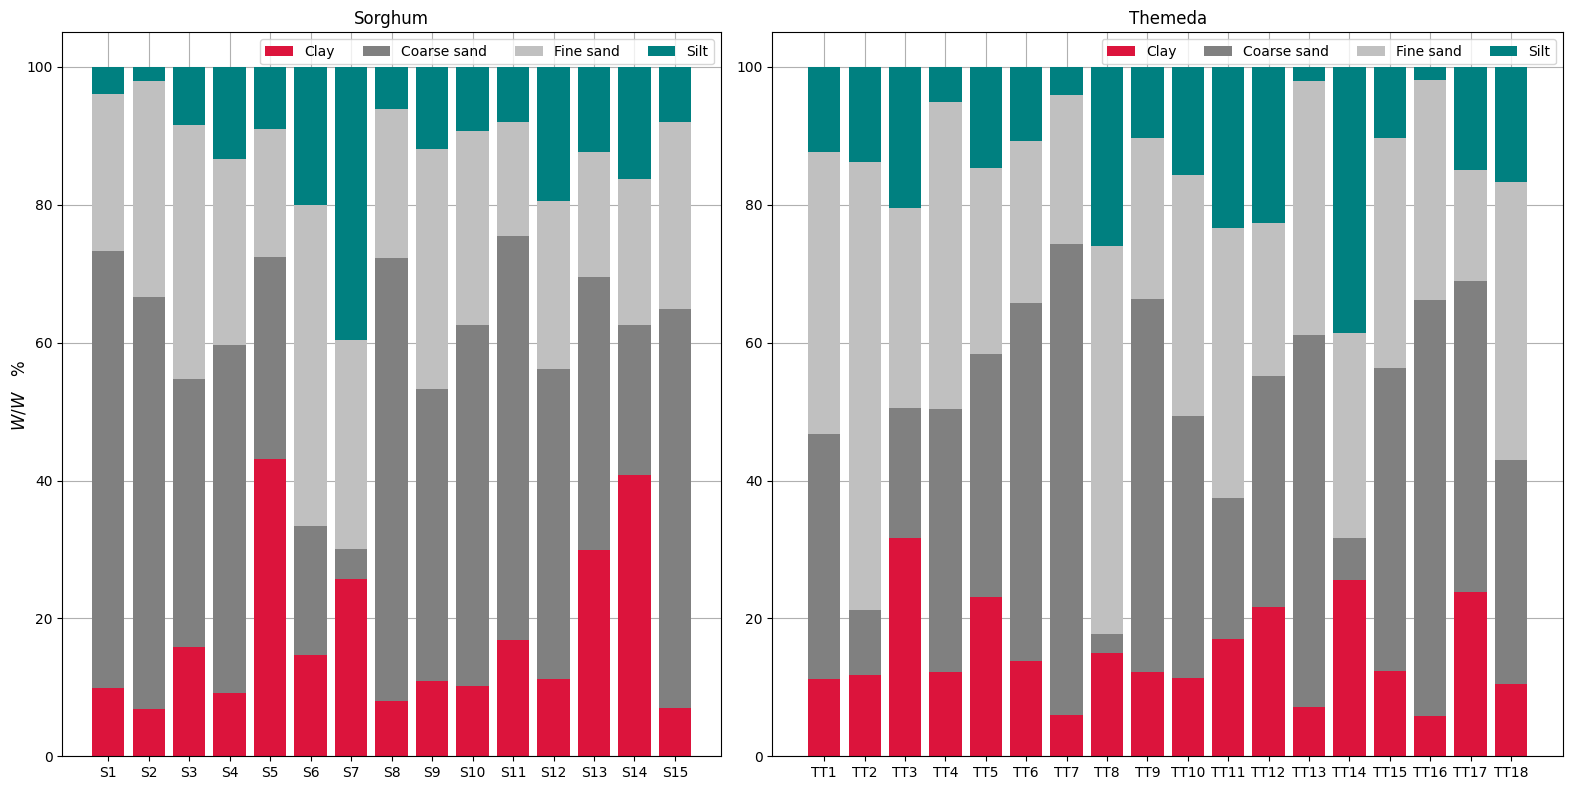

In [13]:
# Soil texture
fig, axes = plt.subplots(ncols=2, width_ratios=(15, 18))
fig.set_size_inches(16, 8)

for (axis, df, title) in zip(axes, (sorghum, themeda), ("Sorghum", "Themeda")):
    axis.bar(x=df.customer_sample_id, height=df.prcnt_clay, color="crimson", label="Clay")
    axis.bar(x=df.customer_sample_id, height=df.prcnt_course_sand, bottom=df.prcnt_clay, color="grey", label="Coarse sand")
    axis.bar(x=df.customer_sample_id, height=df.prcnt_fine_sand, bottom=df.prcnt_clay+df.prcnt_course_sand, color="silver", label="Fine sand")
    axis.bar(x=df.customer_sample_id, height=df.prcnt_silt, bottom=df.prcnt_clay+df.prcnt_sand, color="teal", label="Silt")
    axis.legend(loc="upper right")
    axis.set_axisbelow(True)
    axis.grid()
    axis.legend(loc="upper right", ncols=4)
    axis.set_title(title)
fig.supylabel(r"$W/W\hspace{1}\%$")    
plt.tight_layout()
plt.show()
# plt.savefig(fname=r"../plots/emma_soil_texture.jpeg", dpi=500)

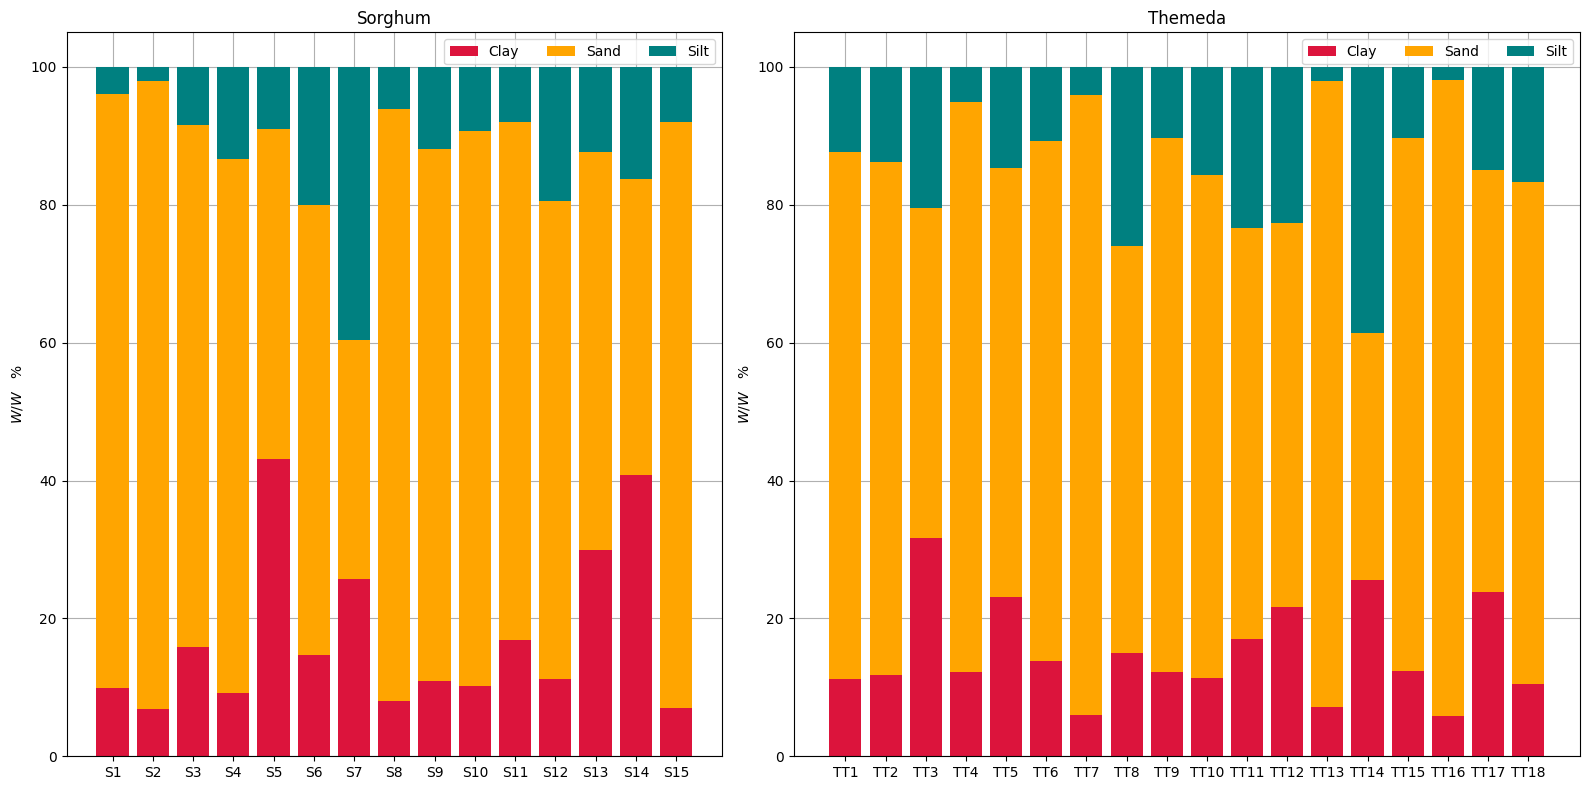

In [9]:
# without differentiating sand into coarse and fine sand

fig, axes = plt.subplots(ncols=2, width_ratios=(15, 18))
fig.set_size_inches(16, 8)

for (axis, df, title) in zip(axes, (sorghum, themeda), ("Sorghum", "Themeda")):
    axis.bar(x=df.customer_sample_id, height=df.prcnt_clay, color="crimson", label="Clay")
    axis.bar(x=df.customer_sample_id, height=df.prcnt_sand, bottom=df.prcnt_clay, color="orange", label="Sand")
    axis.bar(x=df.customer_sample_id, height=df.prcnt_silt, bottom=df.prcnt_clay+df.prcnt_sand, color="teal", label="Silt")
    axis.legend(loc="upper right", ncols=3)
    axis.set_axisbelow(True)
    axis.grid()
    axis.set_ylabel(r"$W/W\hspace{1}\%$")
    axis.set_title(title)

plt.tight_layout()
plt.show()

# ___Goegraphics___
-------------

In [9]:
sorghum;

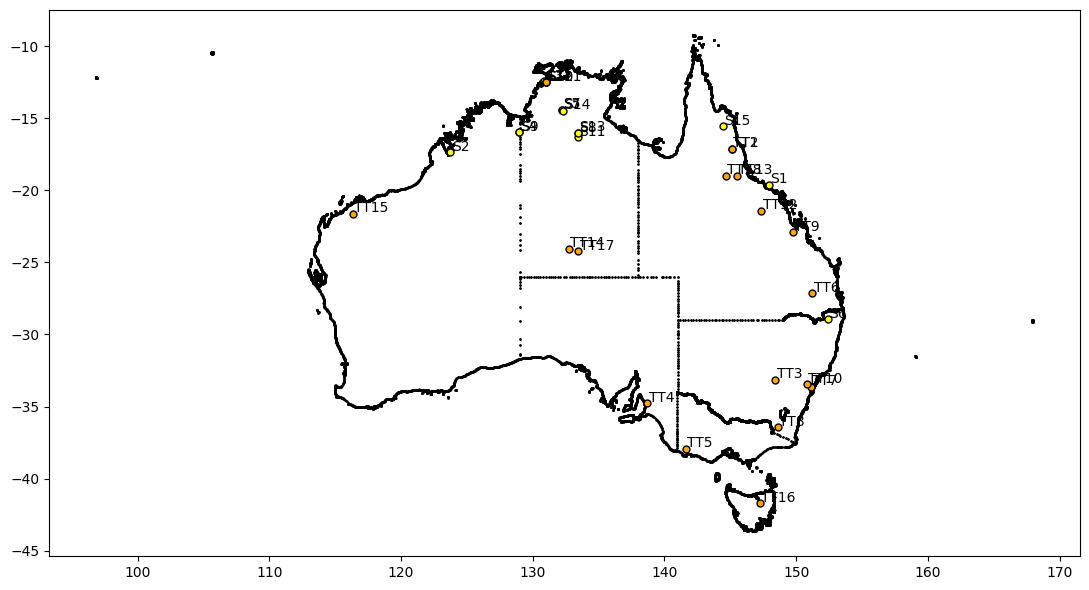

In [13]:
fig, axes = plt.subplots()
fig.set_size_inches(11, 6)
axes.scatter(border[:, 0], border[:, 1], color="black", s=0.5)
for (_, (sample, lat, long)) in sorghum.loc[:, ["customer_sample_id", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="yellow", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")
for (_, (sample, lat, long)) in themeda.loc[:, ["customer_sample_id", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="orange", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")    
# axes.legend()
plt.tight_layout()
plt.show()

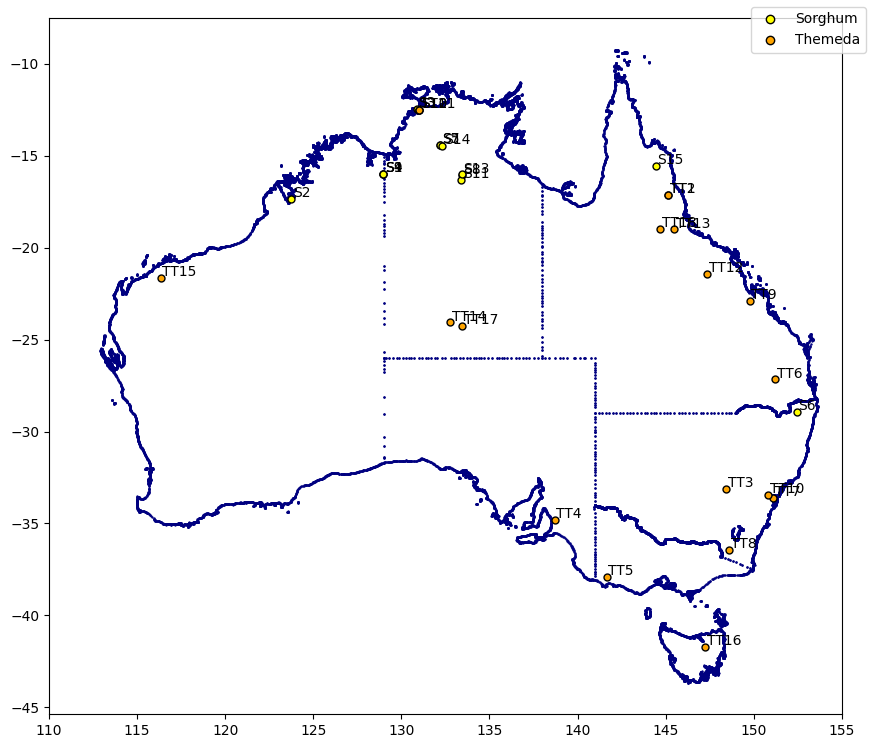

In [35]:
fig, axes = plt.subplots()
fig.set_size_inches(8.75, 7.5)
axes.scatter(border[:, 0], border[:, 1], color="navy", s=0.5)
for (_, (sample, lat, long)) in geo.loc[:, ["soil_sample_ID", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="yellow", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black")
for (_, (sample, lat, long)) in themeda.loc[:, ["customer_sample_id", "latitude", "longitude"]].iterrows():
    axes.plot(long, lat, label=sample, marker='o', markersize=5, markeredgecolor="black", markerfacecolor="orange", linestyle="none")
    axes.text(x=long+.1, y=lat+.1, s=sample, color="black") 
fig.legend(handles=(Line2D(xdata=[0], ydata=[0], color="yellow", label="Sorghum", marker='o', markeredgecolor="black", linestyle="none"),
                    Line2D(xdata=[0], ydata=[0], color="orange", label="Themeda", marker='o', markeredgecolor="black", linestyle="none")),
           ncols=1)#, loc="upper right") 
axes.set_xlim(110, 155)
plt.tight_layout()
plt.show()
# plt.savefig(fname=r"../plots/emma_sample_locations.jpeg", format="jpeg", dpi=500)